In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression

import warnings 
warnings.filterwarnings('ignore')

# 1. Data Exploration

In [4]:
#Load the training dataset
titanic_train = pd.read_csv("C:\\Users\\admin\\Desktop\\DataScience\\New Assignment\\Logistic Regression\\Titanic_train.csv")
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
#Load the testing dataset
titanic_test = pd.read_csv("C:\\Users\\admin\\Desktop\\DataScience\\New Assignment\\Logistic Regression\\Titanic_test.csv")
titanic_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [7]:
# Summary statistics
titanic_train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [8]:
# Examine the features and their types
print(titanic_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


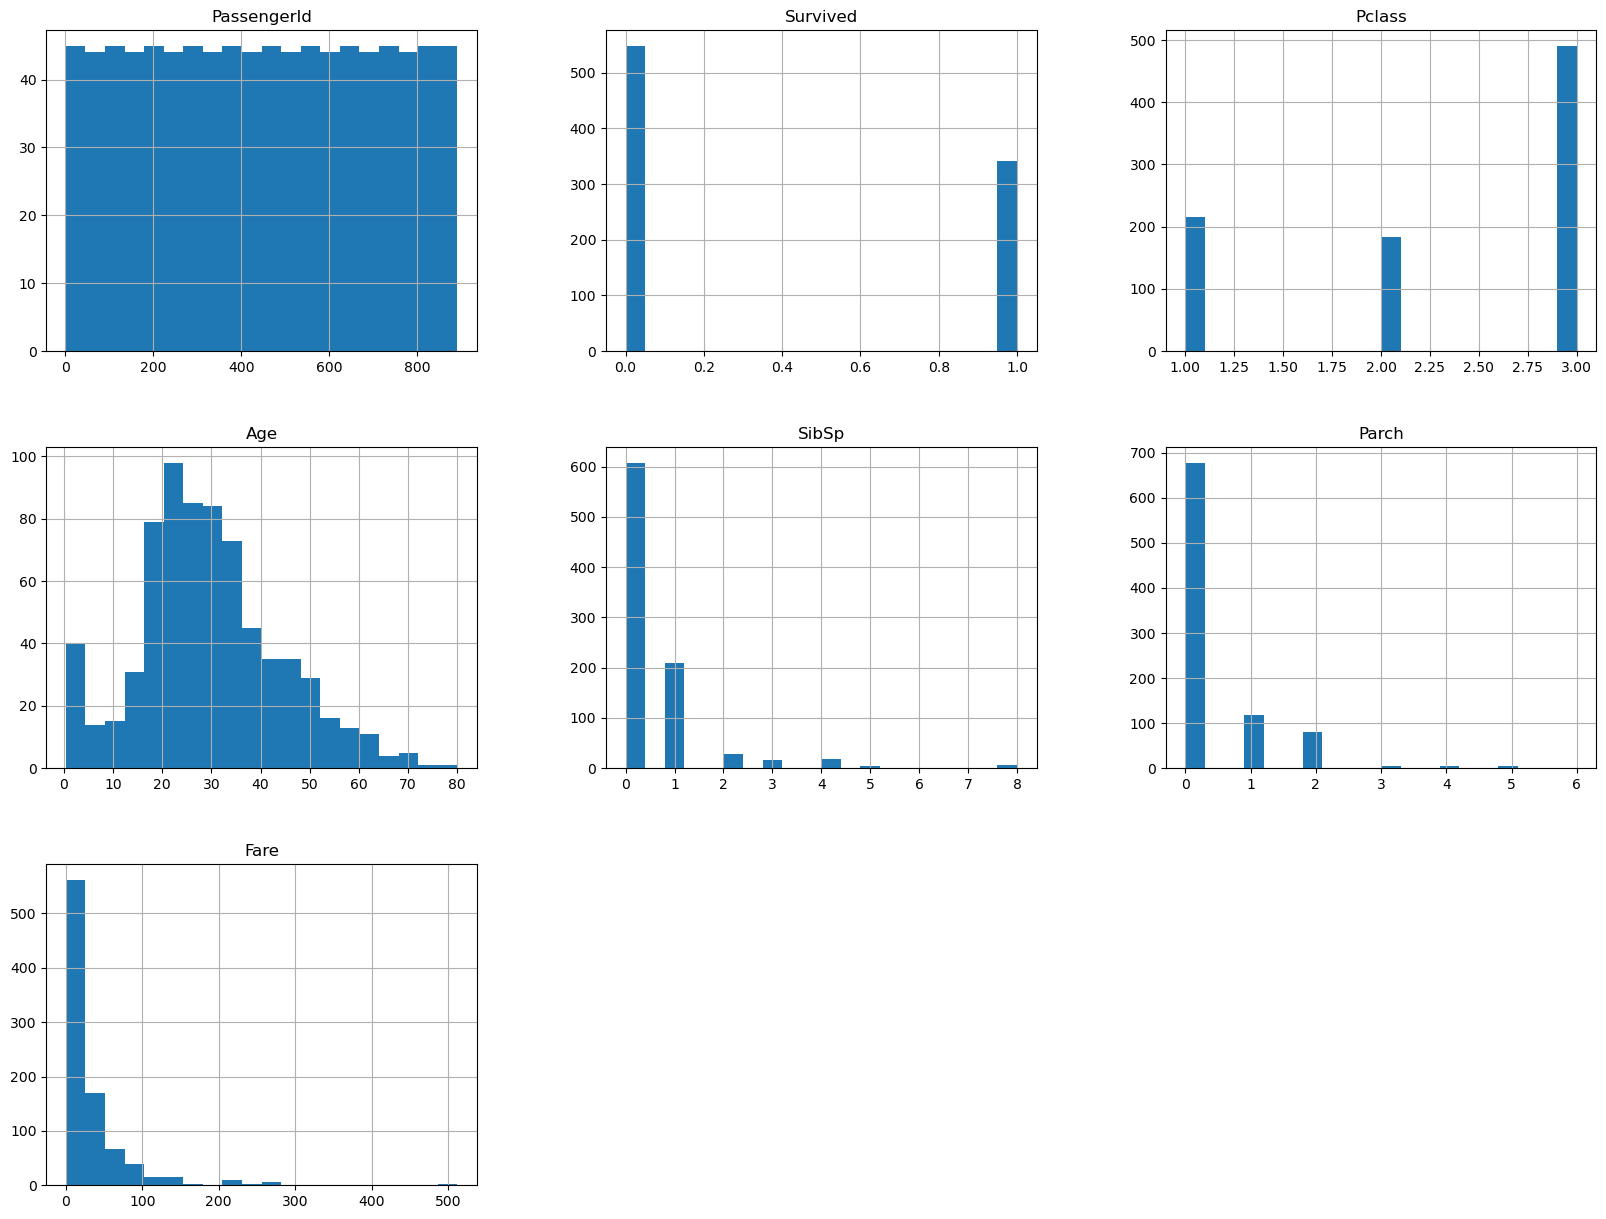

In [9]:
# Histograms for numeric features
titanic_train.hist(bins=20, figsize=(20,15))
plt.show()

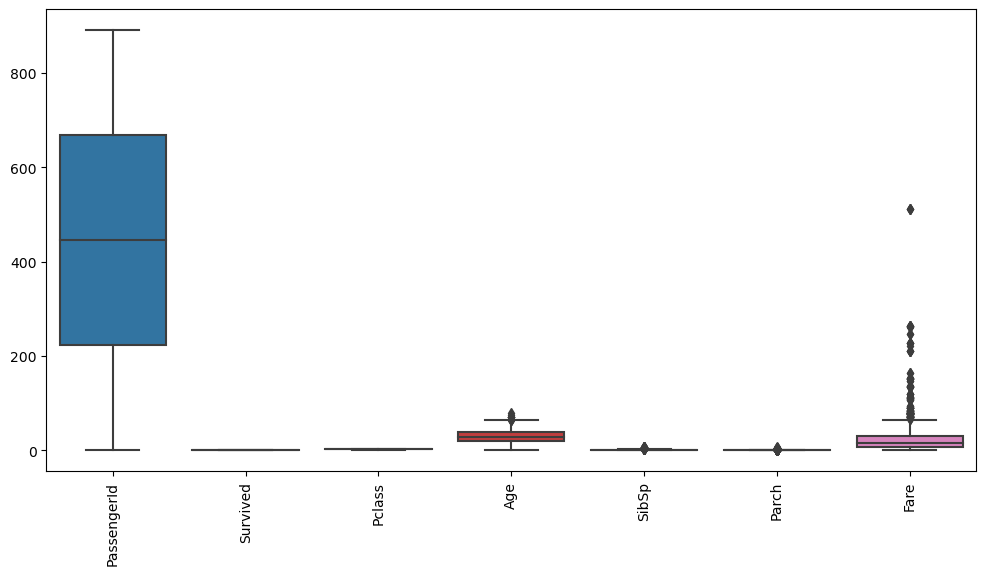

In [10]:
# Box plots for numeric features
plt.figure(figsize=(12, 6))
sns.boxplot(data=titanic_train.select_dtypes(include=['float64', 'int64']))
plt.xticks(rotation=90)
plt.show()


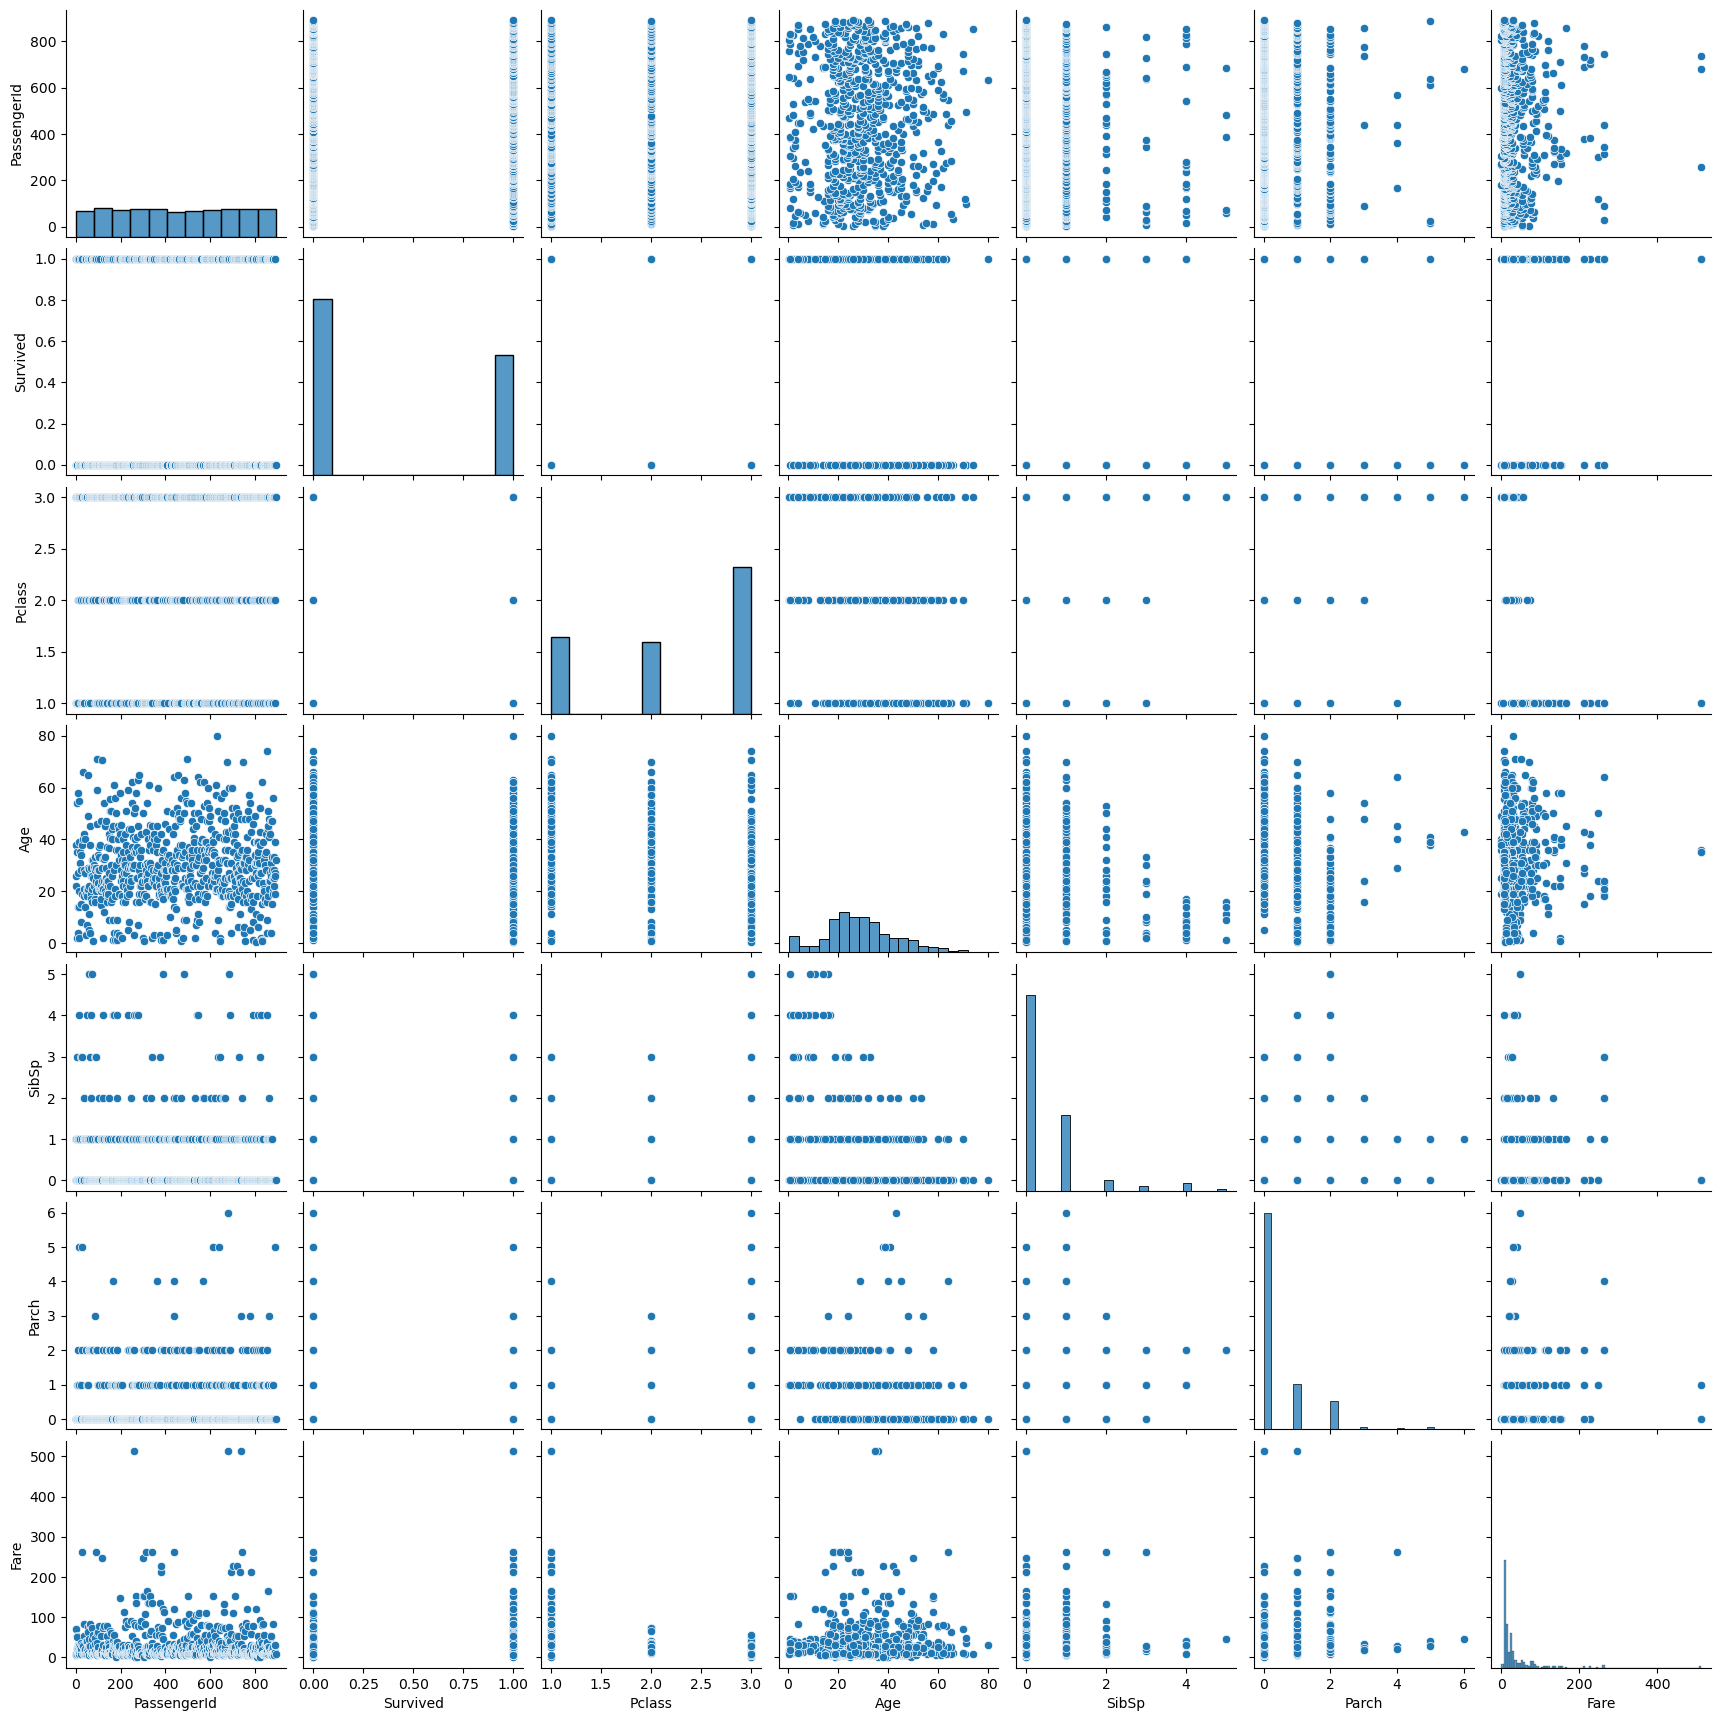

In [11]:
# Pair plots
sns.pairplot(titanic_train.select_dtypes(include=['float64', 'int64']).dropna())
plt.show()

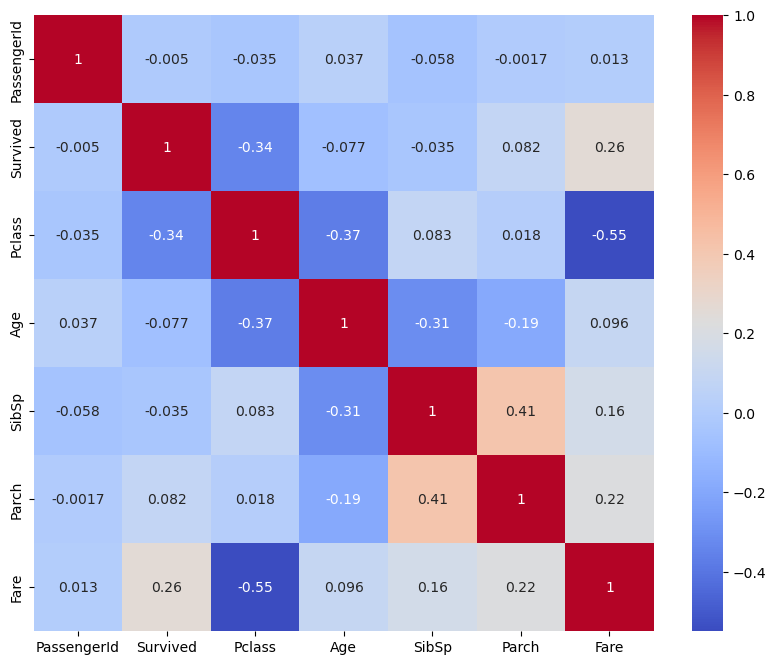

In [12]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(titanic_train.corr(), annot=True, cmap='coolwarm')
plt.show()

# 2. Data Preprocessing

In [13]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [14]:
# Separate features and target variable from training data
X_train = titanic_train.drop(columns=['Survived'])
y_train = titanic_train['Survived']

In [15]:
# Identify categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns
numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

In [16]:
# Preprocessing pipelines for both numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [17]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [18]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [19]:
# Apply preprocessing to the training and test data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(titanic_test)

# 3. Model Building

In [20]:
from sklearn.linear_model import LogisticRegression

# Build the logistic regression model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

# 4. Model Evaluation

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Predict on the training data
y_train_pred = model.predict(X_train)

In [22]:
# Predict probabilities on the training data
y_train_prob = model.predict_proba(X_train)[:, 1]

In [23]:
# Evaluate the performance
accuracy = accuracy_score(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)
roc_auc = roc_auc_score(y_train, y_train_prob)

In [24]:
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print(f'ROC-AUC: {roc_auc:.4f}')

Accuracy: 0.9270
Precision: 0.9601
Recall: 0.8450
F1-score: 0.8989
ROC-AUC: 0.9804


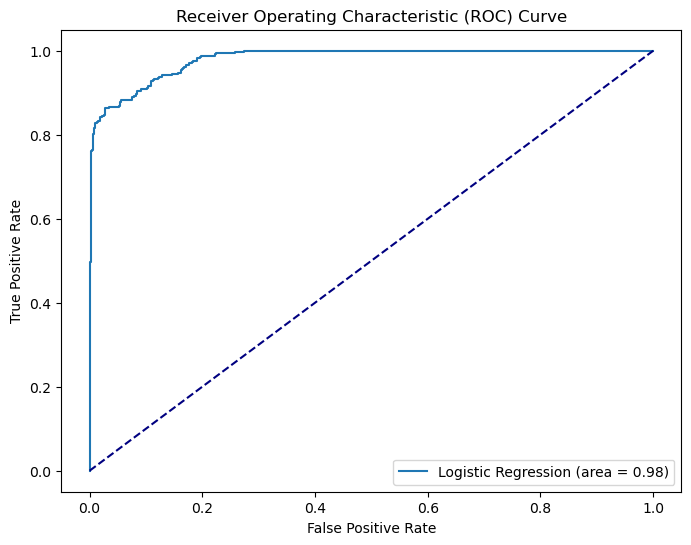

In [25]:
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_train, y_train_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# 5. Interpretation

In [27]:
# Coefficients of the logistic regression model
import numpy as np

# Get feature names from the preprocessor
numerical_feature_names = preprocessor.transformers_[0][1].named_steps['scaler'].get_feature_names_out(numerical_cols)
categorical_feature_names = preprocessor.transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_cols)

In [28]:
# Combine numerical and categorical feature names
feature_names = np.concatenate([numerical_feature_names, categorical_feature_names])

In [29]:
# Create a DataFrame for coefficients
coefficients = pd.DataFrame(model.coef_.T, index=feature_names, columns=['Coefficient'])

print(coefficients)

             Coefficient
PassengerId     0.010119
Pclass         -0.788262
Age            -0.535793
SibSp          -0.325431
Parch          -0.054947
...                  ...
Cabin_G6       -0.462216
Cabin_T        -0.226068
Embarked_C      0.186498
Embarked_Q      0.090848
Embarked_S     -0.226924

[1730 rows x 1 columns]


In [30]:
# Discussing the significance of features
print("Feature significance in predicting the survival probability:")
print(coefficients.sort_values(by='Coefficient', ascending=False))

Feature significance in predicting the survival probability:
                   Coefficient
Ticket_1601           1.849758
Sex_female            1.459361
Ticket_2661           1.230847
Ticket_C.A. 37671     1.089165
Ticket_347077         1.061634
...                        ...
Ticket_2678          -0.877477
Cabin_C22 C26        -0.897179
Ticket_349909        -0.935178
Ticket_347082        -1.075410
Sex_male             -1.408940

[1730 rows x 1 columns]
